<a href="https://colab.research.google.com/github/mkteranb/Ghostblog/blob/master/U3_A1_MKTB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Datos**  

**Maestría de Ciencias de Datos e Información**

**Martha Karina Terán Botello**

**Procesamiento de Información 2021-2**

**Unidad 3. Inferencia estadística: Modelos de N-gramas**

**Actividad 1. Predicción de secuencias de palabras**

*Septiembre, 24 2021*

#**Instrucciones**

**Entregar un documento en formato PDF con la estructura: introducción, desarrollo y conclusiones.**

El documento debe incluir:

1. Calcular los modelos de probabilidad MLE y MLE con suavizado de Laplace para un modelo de bigramas. Con el corpus "europarl.es".
2. Calcular si la siguientes oraciones son posibles, es decir, calcular las probabilidades de las siguientes oraciones usando el modelo de MLE y MLE con suavizado de Laplace. Comparar las probabilidades.

3. Predicción de palabras, dada una palabra inicial mostrar las siguientes cinco palabras más probables de acuerdo con los modelos MLE y MLE con suavizado de Laplace.



In [ ]:
#Se importan las librerías que se van a utilizar

import pandas as pd
import numpy as np
import collections
import io
import re
import unicodedata
import pickle
import nltk
from nltk.util import ngrams
from nltk.collections import *

#**Introducción**
Para este ejercicios partimos del concepto de inferencia estadística, que consiste en tomar algunos datos generados según una distribución de probabilidad desconocida y obtener algunas conclusiones sobre ella usando n-gramas, es decir, que en lugar de calcular la probabilidad de una palabra dada su historia completa, nos aproximamos a ella solo por lass últimas palabras.

Para esto se agrupa en bigramas o trigramas, y se calcula la probabilidad de la siguiente manera conforme a este ejemplo:

          <s> El cielo está despejado, </s>

en lugar de calcular la Probabilidad de que la siguiente palabra sea **"lloverá"** de esta manera:

          P(lloverá | El cielo está despejado)
aproximamos la probabilidad así:

          P(lloverá | despejado)



# **Desarrollo**

Como actividades previas, se realiza la carga de los datos proporcionados.


In [ ]:
#Se carga el archivo de datos
f = open("/content/europarl.es", "r")
lineas = f.readlines()
f.close()

In [ ]:
#Se obtiene la totalidad de líneas del archivo de datos y comprobamos que se lee correctamente
print(len(lineas))
print(lineas[0])

100000
declaro reanudado el período de sesiones del parlamento europeo , interrumpido el viernes 17 de diciembre pasado , y reitero a sus señorías mi deseo de que hayan tenido unas buenas vacaciones .



Se realiza la limpieza de los datos: se suprimen acentos, puntuación y se convierte a minúsculas, se conservan los stopwords ya que ayudan a formar las oraciones.

In [ ]:
#Quitamos acentos y caracteres especiales del texto
def quita_acentos(cadena):
  valor=unicodedata.normalize('NFKD',cadena)
  return u''.join([i for i in valor if not unicodedata.combining(i)])

In [ ]:
lineas_clean = []
for i in range(len(lineas)):
  clean_text = quita_acentos(lineas[i])
  clean_text = re.sub('[^a-zA-Z0-9 ]', '', clean_text)
  lineas_clean.append(clean_text)

In [ ]:
len(lineas_clean)

100000

In [ ]:
lineas_clean[1:5]

['como todos han podido comprobar  el gran  efecto del ano 2000  no se ha producido  en cambio  los ciudadanos de varios de nuestros paises han sido victimas de catastrofes naturales verdaderamente terribles ',
 'sus senorias han solicitado un debate sobre el tema para los proximos dias  en el curso de este periodo de sesiones ',
 'a la espera de que se produzca  de acuerdo con muchos colegas que me lo han pedido  pido que hagamos un minuto de silencio en memoria de todas las victimas de las tormentas  en los distintos paises de la union europea afectados ',
 'invito a todos a que nos pongamos de pie para guardar un minuto de silencio ']

In [ ]:
#Incorporamos el inicio y fin de cada línea en la variable corpus
corpus = []
for i in range(len(lineas)):
  corpus.append('<s> ' + lineas_clean[i] + ' </s>')

In [ ]:
corpus[0:2]

['<s> declaro reanudado el periodo de sesiones del parlamento europeo  interrumpido el viernes 17 de diciembre pasado  y reitero a sus senorias mi deseo de que hayan tenido unas buenas vacaciones  </s>',
 '<s> como todos han podido comprobar  el gran  efecto del ano 2000  no se ha producido  en cambio  los ciudadanos de varios de nuestros paises han sido victimas de catastrofes naturales verdaderamente terribles  </s>']

In [ ]:
type(corpus)

list

In [ ]:
#A partir de los textos limpios, generamos las listas de palabras de cada oración
tokens = []
for i in range(len(corpus)):
  linea=str(corpus[i])
  tokens.append(linea.split())

In [ ]:
tokens[0]

['<s>',
 'declaro',
 'reanudado',
 'el',
 'periodo',
 'de',
 'sesiones',
 'del',
 'parlamento',
 'europeo',
 'interrumpido',
 'el',
 'viernes',
 '17',
 'de',
 'diciembre',
 'pasado',
 'y',
 'reitero',
 'a',
 'sus',
 'senorias',
 'mi',
 'deseo',
 'de',
 'que',
 'hayan',
 'tenido',
 'unas',
 'buenas',
 'vacaciones',
 '</s>']

In [ ]:
len(tokens)

100000

In [ ]:
#Obtenemos la totalidad de palabras de todo el corpus
corpus_completo=[]
for i in range(len(tokens)):
  corpus_completo.extend(tokens[i])
len(corpus_completo)

2732746

In [ ]:
type(corpus_completo)

list

In [ ]:
#Obtenemos la frecuencia de las palabras de todo el corpus
Freq = nltk.FreqDist(corpus_completo)

In [ ]:
len(Freq)

46999

Se identificaron un total de **46,999** Unigramas, incluyendo las marcas de inicio y fin de línea.

In [ ]:
df = pd.DataFrame(Freq.most_common(), columns=['x','frecuency'])

In [ ]:
#Se genera la probabilidad de los Unigramas con base en su conteo y el total del número de palabras.
df['P(Unigrama)'] = df['frecuency'] / len(corpus_completo)
df.head()

,x,frecuency,P(Unigrama)
0,de,173744,0.063579
1,la,117647,0.043051
2,<s>,100000,0.036593
3,</s>,100000,0.036593
4,que,97197,0.035568


In [ ]:
df.tail()

,x,frecuency,P(Unigrama)
46994,persuasiva,1,3.659323e-07
46995,elaborador,1,3.659323e-07
46996,checks,1,3.659323e-07
46997,frenetica,1,3.659323e-07
46998,frenarla,1,3.659323e-07


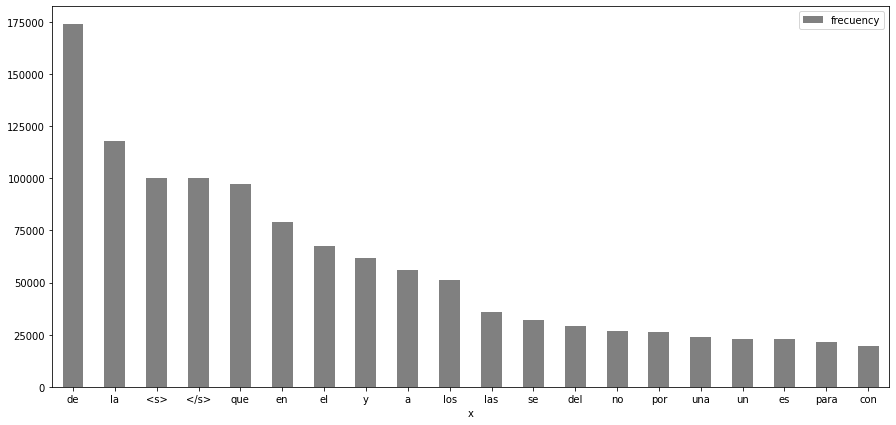

In [ ]:
#Se obtiene la gráfica de las primeras 20 frecuencias de palabras (unigramas) 
grafica = df[['x','frecuency']]
grafica.iloc[0:20].plot.bar(x = 'x', rot = 0, color = 'gray', figsize=(15,7))

Procedemos a obtener los pares de palabras (bigrams) y sus frecuencias

In [ ]:
#A partir del textos limpio, generamos las listas de pares de palabras (bigramas)
bigramas = []
pares = nltk.ngrams(corpus_completo, 2)
for i in pares:
  bigramas.append(i)

In [ ]:
len(bigramas)

2732745

In [ ]:
bigramas[0:5]

[('<s>', 'declaro'),
 ('declaro', 'reanudado'),
 ('reanudado', 'el'),
 ('el', 'periodo'),
 ('periodo', 'de')]

In [ ]:
type(bigramas)

list

In [ ]:
#Obtenemos la frecuencia de los pares de palabras de todo el corpus
Freq_bigramas = nltk.FreqDist(bigramas)

In [ ]:
len(Freq_bigramas)

523313

In [ ]:
Freq_bigramas.max()

('</s>', '<s>')

Se obtuvieron un total de **523,313** Bigramas en todo el corpus, incluyendo las generadas con las marcas de inicio y fin de línea.

In [ ]:
df2 = pd.DataFrame(Freq_bigramas.most_common(), columns=['bigrama','frecuency'])
df2.head()

,bigrama,frecuency
0,"(</s>, <s>)",99999
1,"(de, la)",30949
2,"(de, los)",16069
3,"(en, el)",13413
4,"(a, la)",12405


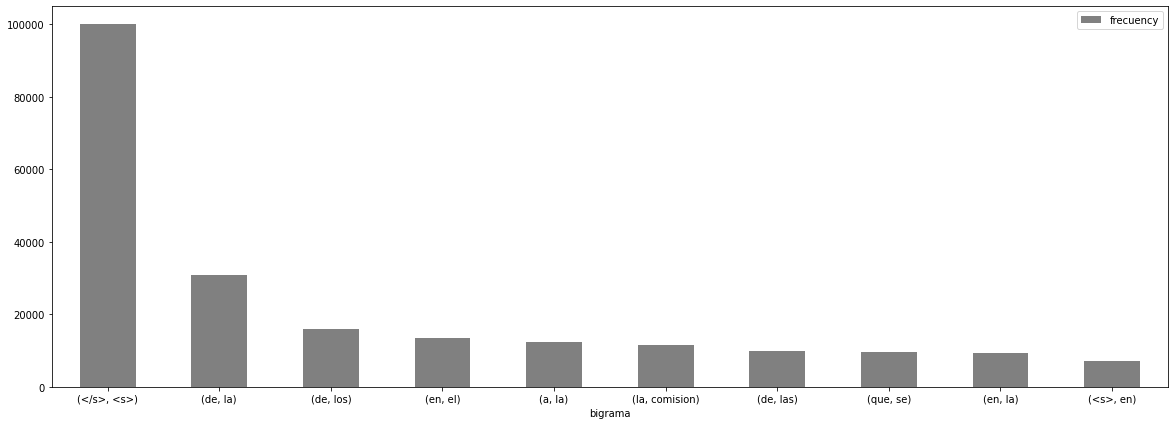

In [ ]:
#Se obtiene la gráfica de las primeras 10 frecuencias de parejas de palabras (bigramas) 
df2.iloc[0:10].plot.bar(x = 'bigrama', rot = 0, color = 'gray', figsize=(20,7))

In [ ]:
dicc=dict(Freq_bigramas)

In [ ]:
df2 = pd.DataFrame(list(dicc.items()), columns = ['bigrama','frecuency'])

In [ ]:
df2.head()

,bigrama,frecuency
0,"(<s>, declaro)",35
1,"(declaro, reanudado)",13
2,"(reanudado, el)",13
3,"(el, periodo)",245
4,"(periodo, de)",343


In [ ]:
df2.shape

(523313, 2)

### 1. Se calculan los modelos de probabilidad MLE y MLE con suavizado de Laplace para un modelo de bigramas.

A partir de la fórmula de probabilidad MLE:

$$P(x|y) = C(xy)/C(x)$$

y la fórmula de probabilidad ajustada (suavizado de Laplace):

$$P_Lap(W_2|W_1)=(C(W_1W_2) + 1)/(C(W_1)+V)$$

donde se agrega un dígito para que los eventos no vistos tengan al menos una ocurrencia.


In [ ]:
#Se genera el conjunto de datos con todos los unigramas y bigramas obtenidos para sacar las Probabilidades 
#con base en la frecuencias de ambos.
x = []
y = []
for i in Freq_bigramas.keys():
  x.append(i[0])
  y.append(i[1])
df3 = pd.DataFrame(x, columns=['x'])
df3['y'] = y
df3['bigrama'] = df2['bigrama']
df3['frecuency_bigrama'] = df2['frecuency']
tabla = pd.merge(df, df3, on = 'x')
#Obtenemos la probabilidad MLE del Bigrama
tabla['P(bigrama)'] = tabla['frecuency_bigrama'] / tabla['frecuency']


In [ ]:
tabla.head()

,x,frecuency,P(Unigrama),y,bigrama,frecuency_bigrama,P(bigrama)
0,de,173744,0.063579,sesiones,"(de, sesiones)",205,0.001180
1,de,173744,0.063579,diciembre,"(de, diciembre)",137,0.000789
2,de,173744,0.063579,que,"(de, que)",5853,0.033687
3,de,173744,0.063579,varios,"(de, varios)",40,0.000230
4,de,173744,0.063579,nuestros,"(de, nuestros)",428,0.002463


In [ ]:
tabla.sample(10)

,x,frecuency,P(Unigrama),y,bigrama,frecuency_bigrama,P(bigrama)
2115,de,173744,0.063579,durar,"(de, durar)",2,0.000012
287861,enormes,162,0.000059,transferencias,"(enormes, transferencias)",1,0.006173
394106,recogen,29,0.000011,las,"(recogen, las)",3,0.103448
134418,ue,1666,0.000610,celebrada,"(ue, celebrada)",1,0.000600
369434,congreso,45,0.000016,federal,"(congreso, federal)",1,0.022222
408035,especificidades,22,0.000008,</s>,"(especificidades, </s>)",1,0.045455
346246,legitimidad,64,0.000023,decide,"(legitimidad, decide)",1,0.015625
268419,critica,212,0.000078,autoincorporada,"(critica, autoincorporada)",1,0.004717
233021,hayan,335,0.000123,hecho,"(hayan, hecho)",9,0.026866
404257,periodicamente,24,0.000009,destruyen,"(periodicamente, destruyen)",1,0.041667


In [ ]:
tabla.describe()

,frecuency,P(Unigrama),frecuency_bigrama,P(bigrama)
count,523313.000000,5.233130e+05,523313.000000,523313.000000
mean,9777.249971,3.577811e-03,5.222009,0.089810
std,29217.536374,1.069164e-02,158.533650,0.212683
min,1.000000,3.659323e-07,1.000000,0.000006
25%,30.000000,1.097797e-05,1.000000,0.000893
50%,232.000000,8.489629e-05,1.000000,0.006981
75%,1757.000000,6.429430e-04,2.000000,0.055556
max,173744.000000,6.357854e-02,99999.000000,1.000000


In [ ]:
#Calculamos la probabilidad del suavizado de Laplace:
# Variable de todos los conteos
V = len(Freq)
tabla['P(suavizado)'] = (tabla['P(bigrama)']+1) / (tabla['frecuency'] + V)

In [ ]:
tabla.head()

,x,frecuency,P(Unigrama),y,bigrama,frecuency_bigrama,P(bigrama),P(suavizado)
0,de,173744,0.063579,sesiones,"(de, sesiones)",205,0.001180,0.000005
1,de,173744,0.063579,diciembre,"(de, diciembre)",137,0.000789,0.000005
2,de,173744,0.063579,que,"(de, que)",5853,0.033687,0.000005
3,de,173744,0.063579,varios,"(de, varios)",40,0.000230,0.000005
4,de,173744,0.063579,nuestros,"(de, nuestros)",428,0.002463,0.000005


In [ ]:
tabla.tail()

,x,frecuency,P(Unigrama),y,bigrama,frecuency_bigrama,P(bigrama),P(suavizado)
523308,persuasiva,1,3.659323e-07,en,"(persuasiva, en)",1,1.0,0.000043
523309,elaborador,1,3.659323e-07,de,"(elaborador, de)",1,1.0,0.000043
523310,checks,1,3.659323e-07,and,"(checks, and)",1,1.0,0.000043
523311,frenetica,1,3.659323e-07,aceleracion,"(frenetica, aceleracion)",1,1.0,0.000043
523312,frenarla,1,3.659323e-07,se,"(frenarla, se)",1,1.0,0.000043


In [ ]:
tabla.describe()

,frecuency,P(Unigrama),frecuency_bigrama,P(bigrama),P(suavizado)
count,523313.000000,5.233130e+05,523313.000000,523313.000000,523313.000000
mean,9777.249971,3.577811e-03,5.222009,0.089810,0.000021
std,29217.536374,1.069164e-02,158.533650,0.212683,0.000007
min,1.000000,3.659323e-07,1.000000,0.000006,0.000005
25%,30.000000,1.097797e-05,1.000000,0.000893,0.000021
50%,232.000000,8.489629e-05,1.000000,0.006981,0.000021
75%,1757.000000,6.429430e-04,2.000000,0.055556,0.000022
max,173744.000000,6.357854e-02,99999.000000,1.000000,0.000043


Al integrar el método del suavizado de Laplace, se puede apreciar que en la **Probabilidad MLE** $P(bigrama)$ los rangos de probabilidad son mayores,  a diferencia de la **Probabilidad de suavizado de Laplace** $P(suavizado)$, donde se normalizan los rangos de probabilidades.

### 2. Se calcula si la siguientes oraciones son posibles, es decir, calcular las probabilidades de las siguientes oraciones usando el modelo de MLE y MLE con suavizado de Laplace. Comparar las probabilidades.

  1. "el parlamento debe enviar un mensaje"
  2. "el parlamento debe enviar un consejo"
  3. "el abismo entre ricos y pobres"
  4. "el abismo entre pobres y ricos"
  5. "la comisión debe ser totalmente transparente"
  6. "la comisión debe ser transparente"

In [ ]:
#Se definen variables para cada oración
oracion1 = 'el parlamento debe enviar un mensaje'
oracion2 = 'el parlamento debe enviar un consejo'
oracion3 = 'el abismo entre ricos y pobres'
oracion4 = 'el abismo entre pobres y ricos'
oracion5 = 'la comision debe ser totalmente transparente'
oracion6 = 'la comision debe ser transparente'

In [166]:
#Se busca la probabiLidad de cada palabra en el dataframe
def calculaP(buscar):
  i = 0
  valor = 0
  prob_total=[]
  for i in range(len(buscar)-1):
    probabilidad = tabla[(tabla['y'] == buscar[i+1]) & (tabla['x'] == buscar[i])] ['P(bigrama)']
    print('Probabilidad de: "',buscar[i+1],',', buscar[i], '" es: ',np.float(probabilidad)) 
    prob_total.append(np.float(probabilidad))
  for j in range(len(prob_total)):
    valor = valor * prob_total[i] # LA MULTIPLICACIÓN FINAL DE LAS PROBABILIDADES DE CADA PALABRA, ME APARECE EN 0!!!!
  #print('Probabilidad total: ','{:.30f}'.format(valor))
  return(valor)

In [174]:
P1 = calculaP(list(oracion1.split(' ')))
P1 = 1.25379296805115E-10
print('Para la oración 1: ',oracion1,'. la Probabilidad MLE es:',float(P1),' Y la de Laplace: ',(float(P1)+1)/len(Freq))

Probabilidad de: " parlamento , el " es:  0.0412485734189035
Probabilidad de: " debe , parlamento " es:  0.010309278350515464
Probabilidad de: " enviar , debe " es:  0.0008086253369272237
Probabilidad de: " un , enviar " es:  0.14285714285714285
Probabilidad de: " mensaje , un " es:  0.0025523446963142413
Para la oración 1:  el parlamento debe enviar un mensaje . la Probabilidad MLE es: 1.25379296805115e-10  Y la de Laplace:  2.1277048450507017e-05


In [178]:
P2 = calculaP(list(oracion2.split(' ')))
P2 = 7.43775489521864E-11
print('Para la oración 2: "',oracion2,'". la Probabilidad MLE es:',float(P2),' Y la de Laplace: ',(float(P2)+1)/len(Freq))

Probabilidad de: " parlamento , el " es:  0.0412485734189035
Probabilidad de: " debe , parlamento " es:  0.010309278350515464
Probabilidad de: " enviar , debe " es:  0.0008086253369272237
Probabilidad de: " un , enviar " es:  0.14285714285714285
Probabilidad de: " consejo , un " es:  0.0015141027859491261
Para la oración 2: " el parlamento debe enviar un consejo ". la Probabilidad MLE es: 7.43775489521864e-11  Y la de Laplace:  2.1277048449421853e-05


In [176]:
P3 = calculaP(list(oracion3.split(' ')))
P3 = 8.70331696730159E-13
print('Para la oración 3: "',oracion3,'". la Probabilidad MLE es:',float(P3),' Y la de Laplace: ',(float(P3)+1)/len(Freq))

Probabilidad de: " abismo , el " es:  0.00013339459603669833
Probabilidad de: " entre , abismo " es:  0.14285714285714285
Probabilidad de: " ricos , entre " es:  0.000992063492063492
Probabilidad de: " y , ricos " es:  0.2835820895522388
Probabilidad de: " pobres , y " es:  0.00016234029773210605
Para la oración 3: " el abismo entre ricos y pobres ". la Probabilidad MLE es: 8.70331696730159e-13  Y la de Laplace:  2.1277048447857837e-05


In [177]:
P4 = calculaP(list(oracion4.split(' ')))
P4 = 7.91840460173575E-15
print('Para la oración 4: "',oracion4,'". la Probabilidad MLE es:',float(P4),' Y la de Laplace: ',(float(P4)+1)/len(Freq))

Probabilidad de: " abismo , el " es:  0.00013339459603669833
Probabilidad de: " entre , abismo " es:  0.14285714285714285
Probabilidad de: " pobres , entre " es:  0.000248015873015873
Probabilidad de: " y , pobres " es:  0.10320284697508897
Probabilidad de: " ricos , y " es:  1.6234029773210604e-05
Para la oración 4: " el abismo entre pobres y ricos ". la Probabilidad MLE es: 7.91840460173575e-15  Y la de Laplace:  2.1277048447839487e-05


In [179]:
P5 = calculaP(list(oracion5.split(' ')))
P5= 2.08517096835582E-09
print('Para la oración 5: "',oracion5,'". la Probabilidad MLE es:',float(P5),' Y la de Laplace: ',(float(P5)+1)/len(Freq))

Probabilidad de: " comision , la " es:  0.09696804848402424
Probabilidad de: " debe , comision " es:  0.010108481262327416
Probabilidad de: " ser , debe " es:  0.15417789757412398
Probabilidad de: " totalmente , ser " es:  0.002446782481037436
Probabilidad de: " transparente , totalmente " es:  0.005639097744360902
Para la oración 5: " la comision debe ser totalmente transparente ". la Probabilidad MLE es: 2.08517096835582e-09  Y la de Laplace:  2.12770484922056e-05


In [180]:
P6 = calculaP(list(oracion6.split(' ')))
P6 = 1.47908127355373E-07
print('Para la oración 6: "',oracion6,'". la Probabilidad MLE es:',float(P6),' Y la de Laplace: ',(float(P6)+1)/len(Freq))

Probabilidad de: " comision , la " es:  0.09696804848402424
Probabilidad de: " debe , comision " es:  0.010108481262327416
Probabilidad de: " ser , debe " es:  0.15417789757412398
Probabilidad de: " transparente , ser " es:  0.0009787129924149743
Para la oración 6: " la comision debe ser transparente ". la Probabilidad MLE es: 1.47908127355373e-07  Y la de Laplace:  2.1277051594887708e-05


Se observa que de las oraciones dadas, la probabilidad de ocurrencia es muy baja y cuando se incorpora el método de suavizado de Laplace incrementa la probabilidad de ocurrencia.

### 3. Por último se realiza la predicción de palabras, dada una palabra inicial mostrar las siguientes cinco palabras más probables de acuerdo con los modelos MLE y MLE con suavizado de Laplace.

In [ ]:
#Se definen las palabras para calcular la predicción
prediccion1 = 'los'
prediccion2 = 'los tribunales'
prediccion3 = 'los tribunales nacionales'
prediccion4 = 'los tribunales nacionales tienen'
prediccion5 = 'los tribunales nacionales tienen aspectos'

#**Conclusión**
Este ejercicio me permitió descubrir una manera de poder analizar el lenguaje, identificando asociaciones entre palabras.

Volví a presentar dificultades para manejar los diferentes tipos de datos en Python, así como también en mandar llamar las diferentes librerías propuestas que nos permiten darle el tratamiento a los textos para realizar las asociación de palabras.(NLTK y pickle), sin embargo pude desarrollar los ejercicios.

Adicionalmente tuve dificultad para presentar el valor total de MLE en el ejercicio 2, realicé las operaciones por fuera aunque si se muestra la fórmula empleada.

Por falta de tiempo no concluí el ejercicio 3.




#**Bibliografía**

> Jurafsky, Daniel y Martin, James H.**Speech and Language Processing** An Introduction to Natural Language Processing,
Computational Linguistics, and Speech Recognition. Prentice Hall, 2008, Capítulo 4 N-grams. página 83 -108.

> NLTK 3.6.2 documentation. https://www.nltk.org/


